In [65]:
from netCDF4 import Dataset as nc, num2date
import pandas as pd
import numpy as np
import os,sys
from matplotlib import pyplot as plt

In [7]:
filename = os.path.join(os.getenv('HOME'),'Data','Darwin','netcdf','CPOL_2.nc')
f = nc(filename)
g1h = f['1h']
g3h = f['3h']
g6h = f['6h']
g24h = f['24h']
varname = 'rain_rate'

In [4]:
percs = np.append(np.linspace(0,99,100),[99.9,99.99,100])

In [54]:
group = g1h
name = 'P1h'

In [55]:
present = group.variables['ispresent'][:]
data = group.variables['rain_rate'][:]
data = data[present> 75,...]
print(data.shape)
data = data[data>0.1]
percvals = np.percentile(data,percs)

(56275, 117, 117)


In [56]:
S = pd.Series(percvals,index=percs)
S.to_pickle(os.path.join(os.getenv('HOME'),name+'.pkl'))

In [58]:
S1h = pd.read_pickle(os.path.join(os.getenv('HOME'),'P1h.pkl'))
S3h = pd.read_pickle(os.path.join(os.getenv('HOME'),'P3h.pkl'))
S6h = pd.read_pickle(os.path.join(os.getenv('HOME'),'P6h.pkl'))
S24h = pd.read_pickle(os.path.join(os.getenv('HOME'),'P24h.pkl'))

In [63]:
DF = pd.DataFrame({'01h_2.5km':S1h,'03h_2.5km':S3h,'06h_2.5km':S6h,'24h_2.5km':S24h})

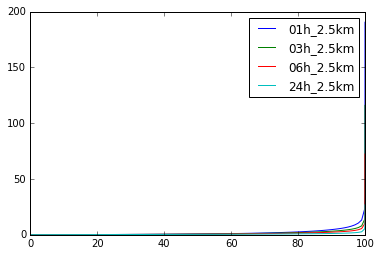

In [70]:
DF.plot()
plt.show()

In [73]:
DF.to_pickle(os.path.join(os.getenv('HOME'),'CPOL_Percentiles.pkl'))